In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('./processed_data.csv')

In [16]:
data.head()

,property_id,prop_type,prop_sub_type,address,branding,prop_status,price,baths_full,baths,beds,building_size,agents,last_update,photo_count,page_no,rank,lot_size,baths_half
0,M4046594895,condo,duplex_triplex,"{'city': 'Philadelphia', 'line': '1516 N 62nd ...",{'listing_office': {'list_item': {'name': 'Arc...,for_sale,249900,3.0,3,6.0,"{'size': 1632, 'units': 'sqft'}","[{'primary': True, 'advertiser_id': '1291281',...",2020-10-13T17:54:05Z,9,1,1,"{'size': 1842, 'units': 'sqft'}",NaN
1,M3939384476,condo,townhomes,"{'city': 'Philadelphia', 'line': '6102 Reedlan...",{'listing_office': {'list_item': {'name': 'Vih...,for_sale,116800,1.0,1,3.0,"{'size': 1092, 'units': 'sqft'}","[{'primary': True, 'advertiser_id': '347285', ...",2020-10-13T18:18:18Z,7,1,2,"{'size': 992, 'units': 'sqft'}",NaN
2,M4036371277,condo,townhomes,"{'city': 'Philadelphia', 'line': '5703 N 13th ...",{'listing_office': {'list_item': {'name': 'Pre...,for_sale,215000,1.0,2,3.0,"{'size': 1360, 'units': 'sqft'}","[{'primary': True, 'photo': None, 'name': 'Kev...",2020-10-13T17:24:20Z,35,1,3,"{'size': 1501, 'units': 'sqft'}",1.0
3,M3553029343,single_family,NaN,"{'city': 'Philadelphia', 'line': '1009 Rhawn S...",{'listing_office': {'list_item': {'name': 'Re/...,for_sale,394800,1.0,2,3.0,"{'size': 1856, 'units': 'sqft'}","[{'primary': True, 'advertiser_id': '4759', 'i...",2020-10-13T17:11:54Z,123,1,4,"{'size': 15913, 'units': 'sqft'}",1.0
4,M3649199107,condo,townhomes,"{'city': 'Philadelphia', 'line': '3850 N Bouvi...",{'listing_office': {'list_item': {'name': 'Re/...,for_sale,130000,1.0,2,3.0,"{'size': 1180, 'units': 'sqft'}","[{'primary': True, 'advertiser_id': '391546', ...",2020-10-13T17:02:13Z,33,1,5,"{'size': 1240, 'units': 'sqft'}",1.0


In [43]:
price_median_by_prop_type = data.groupby('prop_type')['price'].median().rename_axis('prop_type').reset_index(name='median_price')

In [51]:
price_median_by_prop_type

,prop_type,median_price
0,condo,275000.0
1,land,59999.5
2,multi_family,339900.0
3,single_family,379950.0


In [35]:
prop_type_count = data['prop_type'].value_counts().rename_axis('prop_type').reset_index(name='count')

In [36]:
prop_type_count

,prop_type,count
0,condo,7078
1,land,1182
2,multi_family,720
3,single_family,582


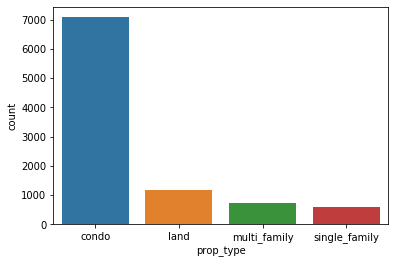

In [37]:
prop_type_plot = sns.barplot(x='prop_type', y='count', data=prop_type_count)

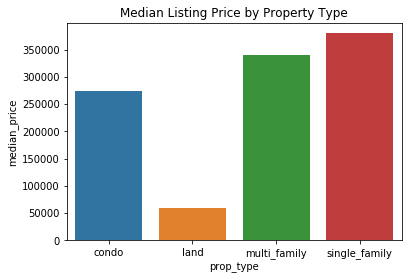

In [50]:
prop_type_plot = sns.barplot(x='prop_type', y='median_price', data=price_median_by_prop_type)
plt.title('Median Listing Price by Property Type')
plt.show()

In [55]:
data[['property_id','price']].head()

,property_id,price
0,M4046594895,249900
1,M3939384476,116800
2,M4036371277,215000
3,M3553029343,394800
4,M3649199107,130000


In [61]:
under_1mil = data[data['price'] < 1000000]

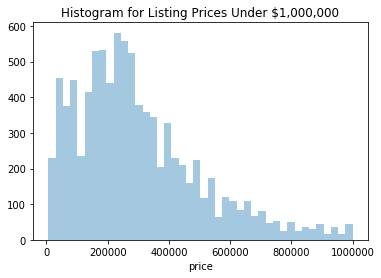

In [67]:
plt.title("Histogram for Listing Prices Under $1,000,000")
sns.distplot(under_1mil['price'], kde=False)
plt.show()